# PHÂN TÍCH NỘI DUNG BÀI VIẾT.

In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
import datetime
import seaborn as sns
import plotly.express as px

In [3]:
df_full = pd.read_csv('Data/hotwheels_done.csv')
len(df_full)
path = 'Data/hotwheels_done.npy'
post_list = np.load(path,allow_pickle = True)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      100 non-null    int64 
 1   post_id         100 non-null    int64 
 2   text            100 non-null    object
 3   time            100 non-null    object
 4   timestamp       100 non-null    int64 
 5   comments        100 non-null    int64 
 6   shares          100 non-null    int64 
 7   post_url        100 non-null    object
 8   user_id         100 non-null    int64 
 9   username        100 non-null    object
 10  comments_full   100 non-null    object
 11  reactions       100 non-null    object
 12  reaction_count  100 non-null    int64 
 13  page_id         100 non-null    int64 
 14  was_live        100 non-null    bool  
dtypes: bool(1), int64(8), object(6)
memory usage: 11.2+ KB


In [4]:
post_list = post_list.tolist()
post_list

[[663497495969085,
  'Only ten cars remain but only one car will take the crown!\r\n\r\nTune in this SATURDAY at 9am PST and see which car will be immortalized into a HotWheels die-cast.',
  '2023-11-09 23:45:33',
  1699573533,
  210,
  364,
  'https://facebook.com/hotwheels/posts/663497495969085',
  100069265216767,
  'Hot Wheels',
  '[{\'comment_id\': \'1085531565938845\', \'comment_url\': \'https://facebook.com/1085531565938845\', \'commenter_id\': \'100001757861021\', \'commenter_url\': \'https://facebook.com/mikey.brown.338211?eav=Afa3xpPpHL72UkGxYM5RxhfGVEExp2bKHZvFOuVwKszJNLHhEj6jld49EUy5hi-GAhE&fref=nf&rc=p&refid=52&__tn__=%7ER&paipv=0\', \'commenter_name\': \'Mikey Brown\', \'commenter_meta\': None, \'comment_text\': \'Can’t wait to see ya there ✌️\', \'comment_time\': datetime.datetime(2023, 11, 9, 9, 0), \'comment_image\': \'https://scontent-sin6-4.xx.fbcdn.net/v/t39.30808-6/399029486_6802447256490469_7293078181442293530_n.jpg?stp=cp0_dst-jpg_e15_q65_s180x540&_nc_cat=101&ccb

## ================================================================================================================

## Độ dài bài viết.

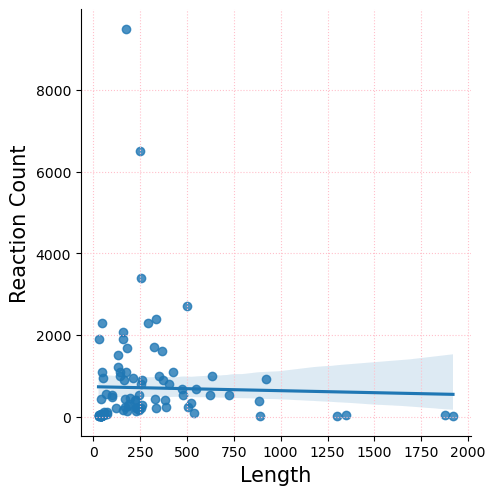

In [5]:
df_full['post_length'] = df_full['text'].apply(lambda x : len(str(x)))
length = df_full['post_length']
reactions = df_full['reaction_count']

sns.lmplot(
    data = df_full, 
    y = 'reaction_count',
    x = 'post_length'
)

plt.grid(True, ls = ':', color = 'pink')
plt.xlabel("Length", fontsize = 15)
plt.ylabel("Reaction Count", fontsize = 15)

plt.savefig("Biểu đồ/7.png")

Ta thấy hầu hết các chấm được phân bố ở những mốc thấp, nơi mà bài viết có độ dài ngắn và lượng tương tác thấp.

## ================================================================================================================


## Nội dung bài viết phổ biến nhất.

In [6]:
a = df_full['text'].tolist()
print("Có tất cả ",len(a),"bài viết:")
res1 = []
res2 = []
for i in a :
  if "Hot Wheels Monster Trucks Live" in i: res1.append(i)
for j in a :
  if "Hot Wheels Legends Tour" in j: res2.append(j)

print(len(res1),"bài viết chưa từ khóa trên 'Hot Wheels Monster Trucks Live'")
print(len(res2),"bài viết chưa từ khóa trên 'Hot Wheels Legends Tour'")

Có tất cả  100 bài viết:
24 bài viết chưa từ khóa trên 'Hot Wheels Monster Trucks Live'
18 bài viết chưa từ khóa trên 'Hot Wheels Legends Tour'


24% số bài viết trong 100 bài mới nhất đều là livestream của Hot Wheels Monster Trucks - một nhánh của đồ chơi Hot Wheels chuyên làm về xe tải quái vật. Họ đã tổ chức sự kiện trực tiếp với những màn trình diễn của những chiếc xe thật, nên họ livestream để mọi người theo dõi cùng xem, cũng là quảng cáo cho dòng đồ chơi này. 

18% số bài viết là về Hot Wheels Legends Tour, một cuộc thi độ xe quy mô lớn được tổ chức tại Mĩ bởi công ty mẹ Mattel (sở hữu dòng đồ chơi Hot Wheels), nhằm tìm ra chiếc xe thắng cuộc để làm thành mô hình tỷ lệ 1:64. Ta có thể thấy cuộc thi này là một trong những yếu tố đóng vai trò rất lớn trong kế hoạch truyền thông và quảng bá của hãng đồ chơi.

## =======================================================================================================

## Tìm những từ xuất hiện nhiều tiêu đề các bài đăng.

In [7]:
df_full['text']
text = "" 
for i in df_full['text']:
  text=text+i+"\n"

In [8]:
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

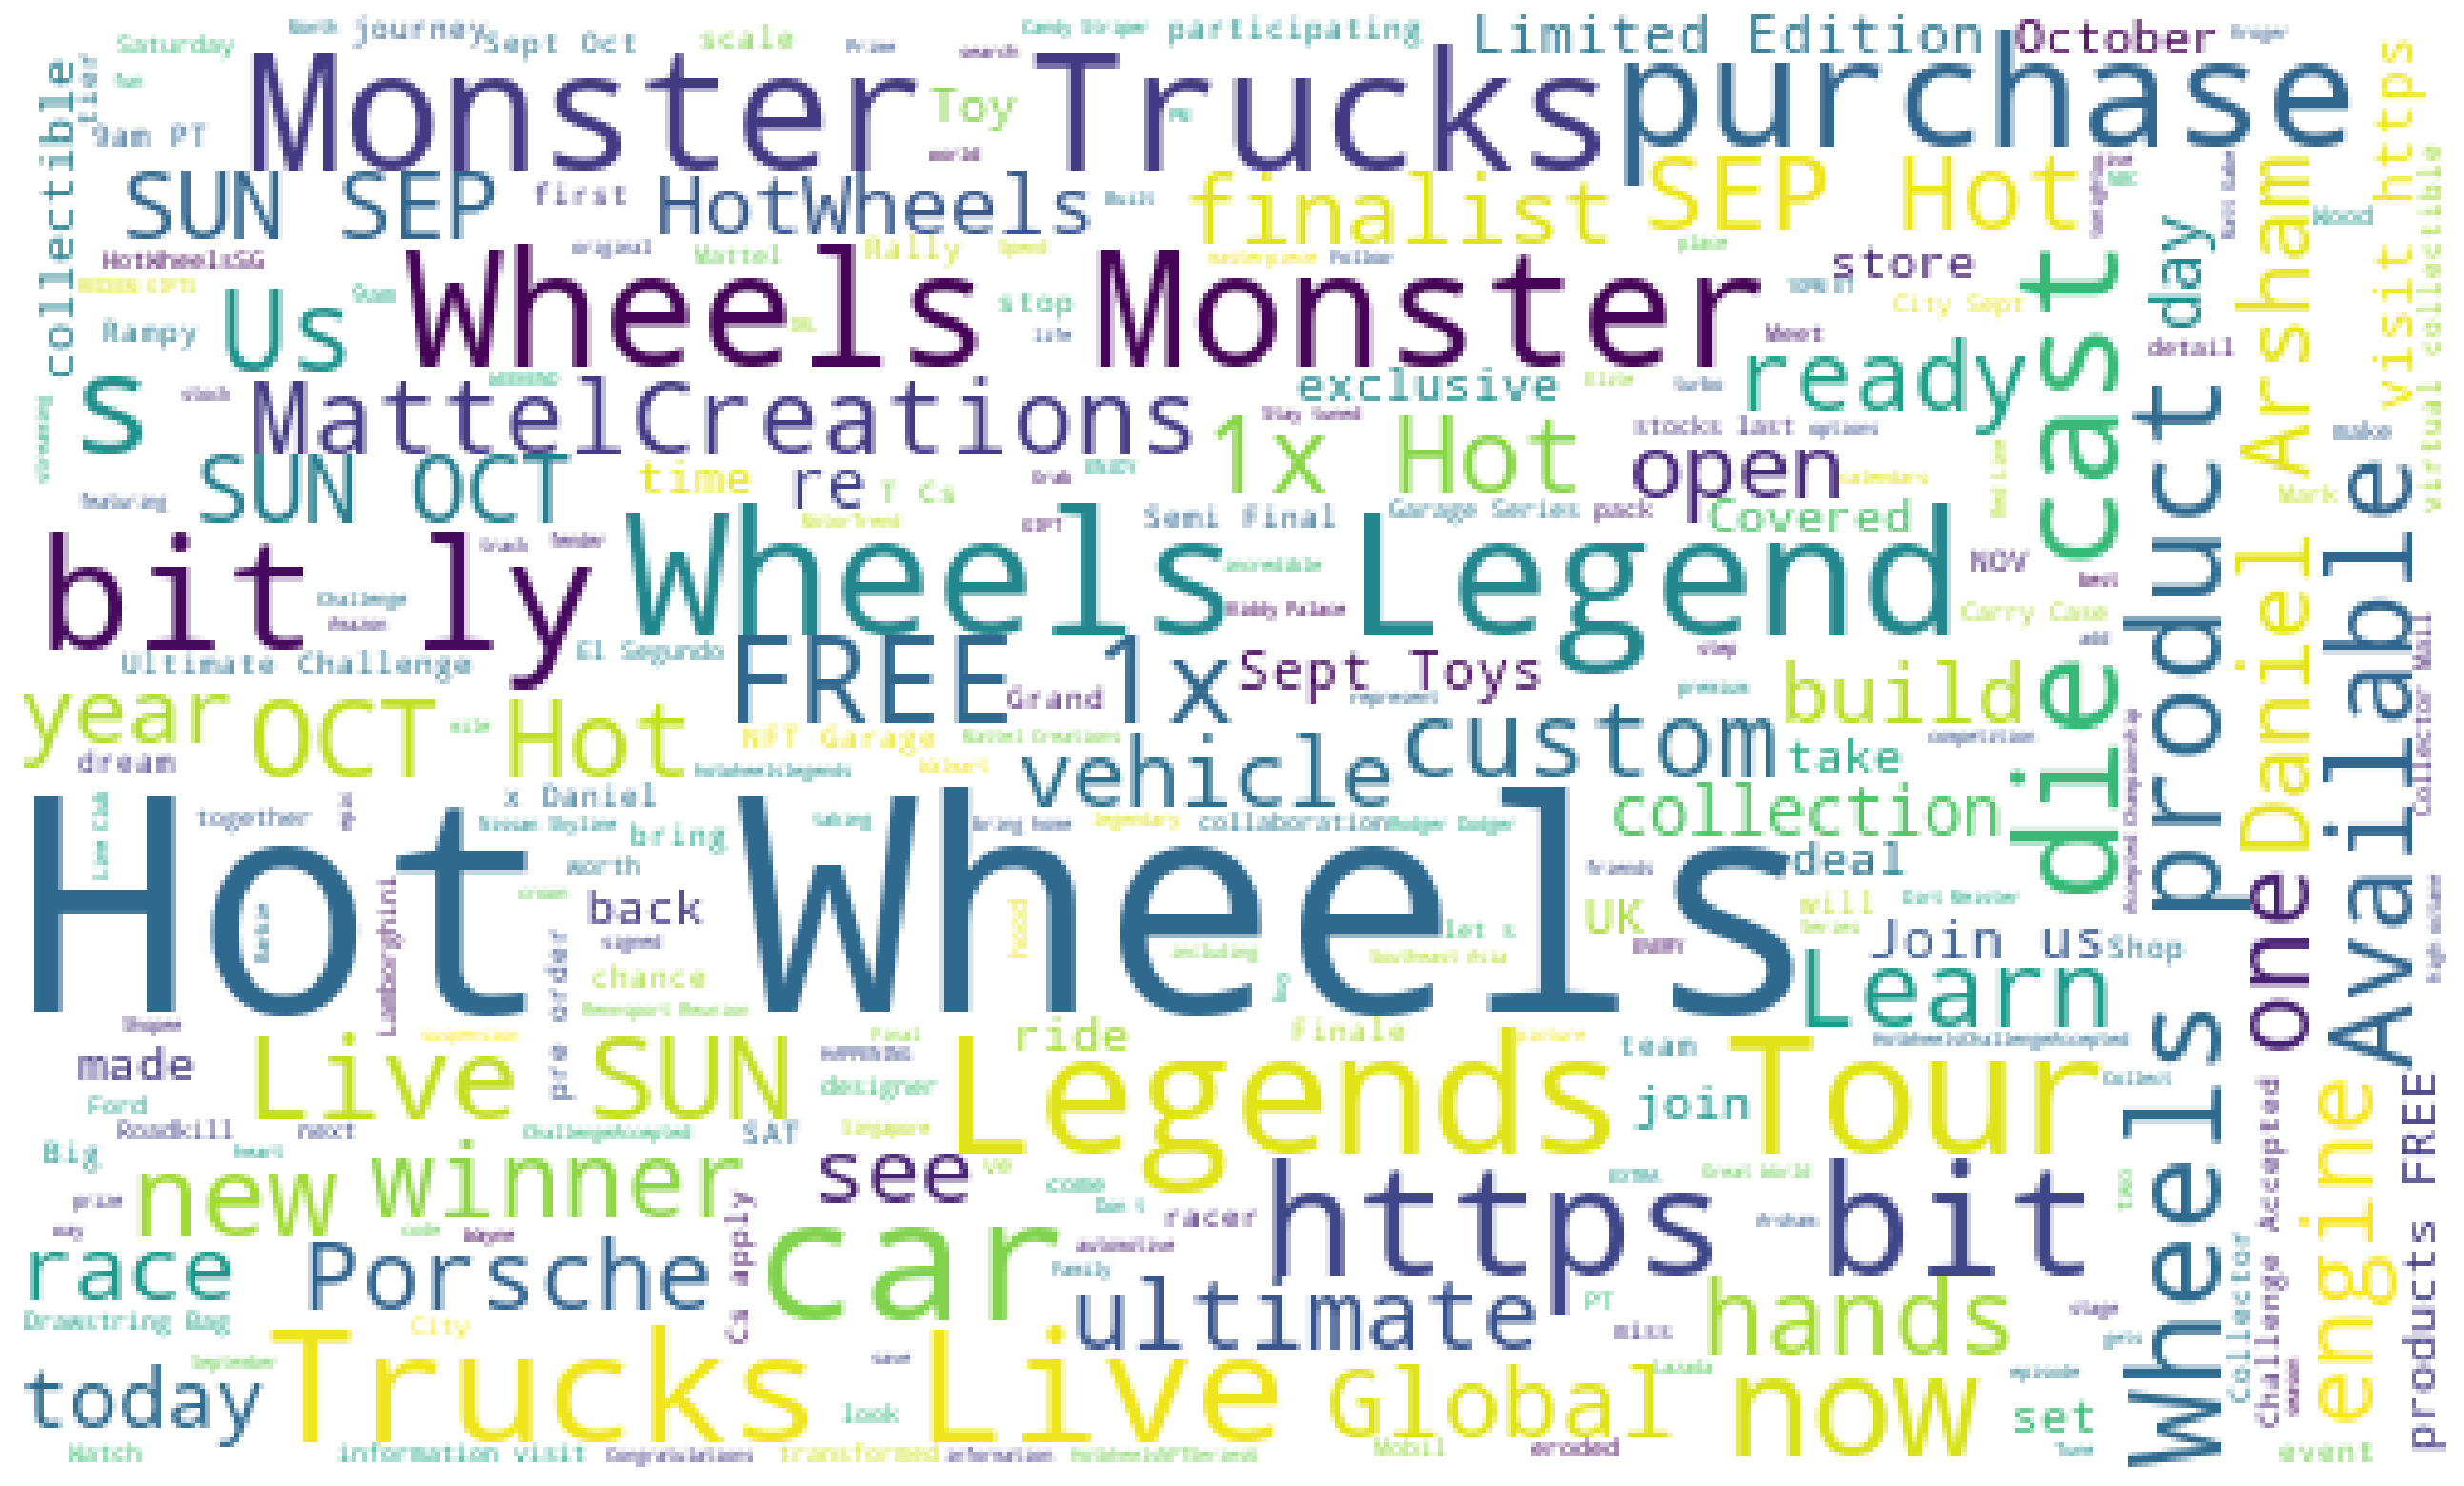

<Figure size 640x480 with 0 Axes>

In [19]:
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

plt.savefig("Biểu đồ/8.png")

## ===============================================================================================

## Tìm từ quan trọng nhất trong tiêu đề bài viết.

Để tìm được từ quan trọng nhất trong bài viết, ta cần tính chỉ số TF và IDF, rồi lấy tích của hai giá trị đó. Từ quan trọng nhất sẽ có giá trị lớn nhất.

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import tokenize
import math
from operator import itemgetter
print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.8.1.


In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
from rake_nltk import Rake
r = Rake()
r.extract_keywords_from_text(text)
# r.get_ranked_phrases()
res_cach1=r.get_ranked_phrases_with_scores()
print(res_cach1)

[(103.80812958970854, 'toys ” r ” us 🎁🦒 ✨ free 1x hot wheels carry case'), (103.80812958970854, 'toys ” r ” us 🎁🦒 ✨ free 1x hot wheels carry case'), (87.44232434232434, '✨ free 1x hot wheels limited edition hot wheels drawstring bag'), (87.44232434232434, '✨ free 1x hot wheels limited edition hot wheels drawstring bag'), (84.06878121878121, 'free 1x limited edition hot wheels ™️ drawstring bag *.'), (83.81732434232434, 'hot wheels products .. ✨ free 1x hot wheels collector mail'), (83.81732434232434, 'hot wheels products .. ✨ free 1x hot wheels collector mail'), (72.06878121878123, 'takashimaya 🔥😎 ⚡ free 1x hot wheels carry case'), (70.06878121878121, 'free 1x limited edition hot wheels ™️ collector mail'), (64.56878121878123, 'free 1x hot wheels limited edition drawstring bag'), (59.20687645687646, 'san diego comic con 🤝 hot wheels racerverse'), (57.80589606471959, '16 – 22 oct 🔥🔥 limited time hot wheels deals'), (56.67150453032806, 'toysrussg 🚨 new hot wheels legends tour finalist 🚨 

In [13]:
def get_unique_numbers(numbers):
    unique = []

    for number in numbers:
        if number in unique:
            continue
        else:
            unique.append(number)
    return unique


a = [i[1] for i in res_cach1]
a.reverse()
a = get_unique_numbers(a)
print(a)    

['10th', '110mph', '15', '2000gt', '26', '29', '31', '40', '420hp', '50', '60', '600', '70', '89', 'accept', 'alarm', 'allows', 'along', 'anticipation', 'anz', 'arrived', 'artist', 'attend', 'authenticity', 'axle', 'backing', 'beadrolling', 'beast', 'becoming', 'bid', 'blurring', 'bone', 'books', 'born', 'brights', 'building', 'builds', 'buy', 'ca', 'calendars', 'careventsingapore', 'cart', 'casts', 'catalyst', 'celebrate', 'celebrating', 'celebrities', 'champion', 'chose', 'chosen', 'clock', 'collect', 'comes', 'compete', 'continuing', 'convenience', 'convert', 'copy', 'countdown', 'crafted', 'create', 'created', 'crown', 'crowning', 'customized', 'cyan', 'dallas', 'date', 'davidson', 'designing', 'determination', 'display', 'dominate', 'done', 'doorstep', 'drive', 'dust', 'earn', 'elite64lbwklamborghini', 'engineering', 'engineers', 'engines', 'enter', 'even', 'everything', 'except', 'exploring', 'fabrication', 'facing', 'fame', 'find', 'finished', 'flip', 'forget', 'function', 'fund

In [14]:
# Số từ xuất hiện trong tài liệu.
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

# Số câu xuất hiện trong tài liệu
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len) 

4474
263


Chỉ số TF (Term Frequency) là số đo bằng "số lần xuất hiện của từ đó trong văn bản" / "tổng số từ trong văn bản".

In [15]:
#Tính TF từng từ.
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in a:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)

tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Only': 2, 'ten': 1, 'cars': 7, 'remain': 1, 'but': 4, 'only': 7, 'will': 5, 'the': 153, 'crown!': 1, 'Tune': 3, 'in': 33, 'this': 27, 'SATURDAY': 1, 'at': 58, 'PST': 2, 'and': 103, 'which': 2, 'be': 10, 'into': 16, 'a': 75, 'HotWheels': 1, 'die-cast': 12, 'Challengers,': 2, 'let’s': 2, 'full': 1, 'speed': 2, 'ahead': 1, 'Nov!': 1, 'ENJOY': 2, 'UP': 4, 'TO': 4, '70%': 2, 'OFF': 5, 'with': 44, 'Shopee': 2, '1111': 4, 'Big': 3, 'Sale': 2, '&': 24, 'Lazada’s': 1, 'Biggest': 1, 'of': 62, 'The': 28, 'Year!': 1, '🗓️': 3, 'BEST': 1, 'DEALS': 2, 'ONLY': 1, 'on': 62, '🤩': 5, ':': 2, 'EXTRA': 2, '$26': 1, 'Voucher*': 2, 'Lazada': 1, '$22': 1, '*T&Cs': 5, 'apply': 5, '💡🎁GIFT-WITH-PURCHASE': 1, 'AWAITS': 1, 'EACH': 1, 'STORE💡': 1, '🧡Shopee:': 1, 'FREE': 9, '1x': 14, 'Thomas': 1, 'Storage': 1, 'Box': 1, '$60': 2, 'above': 11, 'any': 6, '💙Lazada:': 1, 'Hot': 148, 'Wheels': 138, 'Limited': 5, 'Edition': 5, 'Drawstring': 4, 'Bag': 1, '$40': 3, '🚗🏎️💨': 1, 'Shop': 4, 'tracks,': 1, 'zoom,': 1, 'flip,': 

Chỉ số IDF (Inverse Document Frequency) là chỉ số bằng logarit ( "tổng số văn bản" / "số văn bản chứa từ đó" ).

In [16]:
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


#  Tính IDF cho từng từ.
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in a:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

# Tính kết quả là tích TF*IDF.
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()} 
print(tf_idf_score)

{'Only': 2.394100201829819, 'ten': 5.572154032177765, 'cars': 0.4016700371396128, 'remain': 5.572154032177765, 'but': 0.8536551608826699, 'only': 0.7438402948754634, 'will': 0.7846622893957187, 'the': 0.11256851803360554, 'crown!': 5.572154032177765, 'Tune': 0.8185638410713999, 'in': 0.14280840322332372, 'this': 0.16498226071764585, 'SATURDAY': 5.572154032177765, 'at': 0.19225667863730497, 'PST': 1.9612361195335402, 'and': 0.35721827456877897, 'which': 0.8536551608826699, 'be': 0.7201237682581474, 'into': 0.16498226071764585, 'a': 0.1472040146963618, 'HotWheels': 5.572154032177765, 'die-cast': 1.429019305786232, 'Challengers,': 1.8344844138943963, 'let’s': 2.1381668276926185, 'full': 5.572154032177765, 'speed': 0.5885474104694282, 'ahead': 5.572154032177765, 'Nov!': 5.572154032177765, 'ENJOY': 4.879006851617819, 'UP': 2.394100201829819, 'TO': 1.9085923860481182, '70%': 4.473541743509655, 'OFF': 2.799565309937983, 'with': 0.7123416278160924, 'Shopee': 1.2954879131617092, '1111': 1.07234

Những từ quan trọng sẽ có chỉ số TF-IDF cao.

In [17]:
# Lấy ra 20 từ quan trọng nhất.
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 20)

{'Hot': 0.02206037763822566,
 'Wheels': 0.01731997895736438,
 '&': 0.012413361613712736,
 'Live!': 0.011645721862399335,
 '-': 0.010134572409624457,
 'Legends': 0.009798481233825122,
 'SUN,': 0.009666970531357908,
 'of': 0.00893692926134884,
 '"R"': 0.008724196426674689,
 'Trucks': 0.008257764136989629,
 'and': 0.008223844944252176,
 '1x': 0.008062115471777567,
 'with': 0.007005594909232917,
 '–': 0.006759757823781332,
 'for': 0.006485910246632847,
 'Monster': 0.00629670523549089,
 'OCT': 0.006212822700045606,
 '🔥Toys': 0.005675920892944827,
 '✨FREE': 0.005314326490492174,
 'SEP': 0.005259897647093347}

Theo như dữ liệu phân tích, hai từ quan trọng nhất là "Hot" và "Wheels", là tên của fanpage và của hãng đồ chơi sở hữu trang facebook đó. Tiếp đến là những ký tự hay được sử dùng như "&", "-", "_", những từ nối như "with", "of", "for", những từ được sử dung trong bài đăng nhiều lần để nhấn mạnh, thông báo như "Live!" (thông báo phiên live), "Free" (khuyến mãi hoặc ưu đãi), "Toys" và "Trucks" (fanpage hãng đồ chơi ô tô), "OCT" và "SEP" là viết tắt của tháng 10 và tháng 9 (Vì những post livestream có tiêu đề được lưu về là ngày tháng live) và những từ khác.

## =============================================================================================================

## Thời gian đăng bài phổ biến.

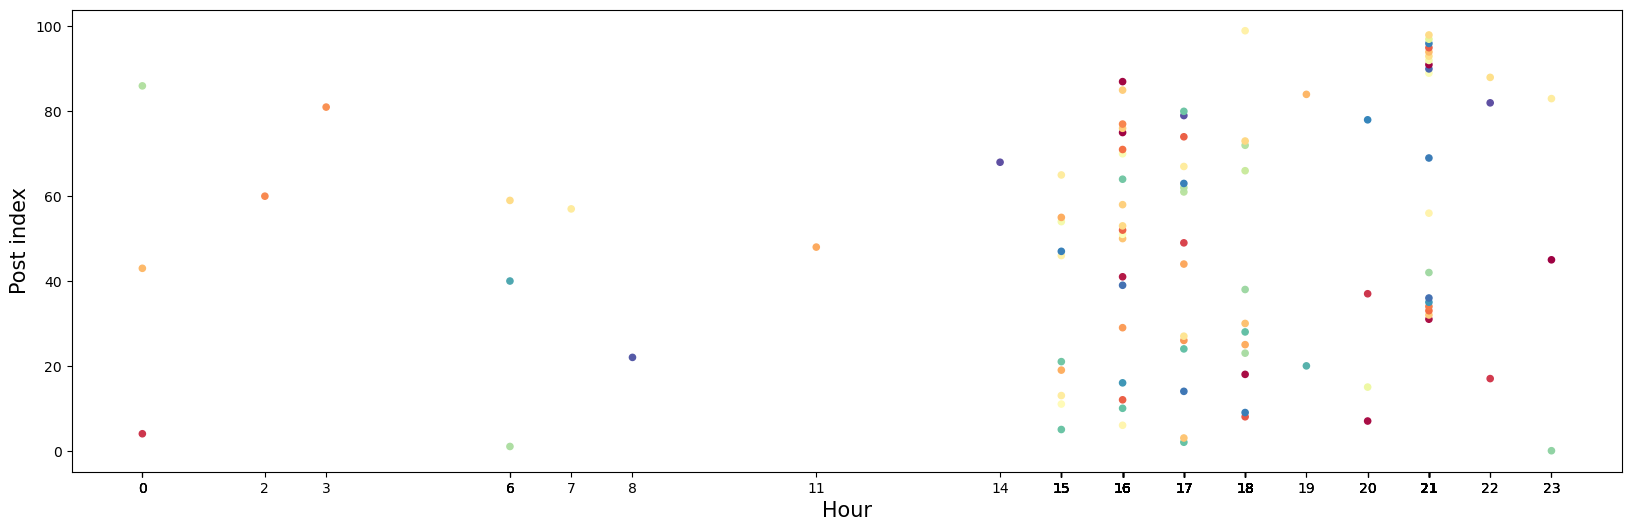

In [22]:
df_full['time'] = pd.to_datetime(df_full['time'])
x = df_full['time'].dt.hour
y = df_full['post_id'].index

plt.figure(figsize = (20,6))
plt.xlabel("Hour", fontsize = 15)
plt.ylabel("Post index", fontsize = 15)

colors = np.random.rand(100)

plt.scatter(x, y, s = 20, c = colors, alpha = 1, cmap = 'Spectral')
plt.xticks(x)

plt.savefig("Biểu đồ/9.png")

Quan sát từ biểu đồ phân bố, ta nhận thấy fanpage Hot Wheels đăng bài viết với tần suất dày đặc hơn trong khoảng từ 15 giờ tới 24 giờ. Đây là khoảng thời gian đỡ bận bịu hơn khi các cơ quan dần tan làm, trường học tan giờ, mọi người trở về nhà nghỉ ngơi, ăn tối và giải trí. Hoặc có thể, thời gian cuối giờ làm, ai cũng có chút lười biếng nên họ lướt mạng xã hội. Có thể vì hiểu được khả năng này, fanpage đã chọn đăng tập trung vào khung giờ 15 giờ tới 18 giờ. Và nếu trong trường hợp có những người theo dõi không xem được luôn, bài viết cũng đã xuất hiện trên trang feed và chuyện nhìn thấy cũng chỉ là vấn đề thời gian. Hơn nữa, những ai thấy được bài viết từ sớm sẽ tương tác, khiến cho thuật toán facebook đẩy những bài viết mới và nổi lên đầu trang cá nhân. 

Tóm lại, đăng bài vào khung giờ chiều, tối cũng có thể là chiến lược để thu về nhiều tương tác nhất có thể khi đó là khung giờ phù hợp và tiềm năng.